**Name:
Student ID:** Trần Việt Hoàng\
**Name:
Student ID:** 19127149
# About Dataset

**Author: Dgomonov**\
**License: CC0: Public Domain**

Airbnb is a lodging brokerage service, it is an online marketplace wherein hosts can put up their properties for rent with a focus on homestays and experiences. Since 2008, the company has provided millions of customers with the means to personalize their traveling experience while keeping a local touch.

This dataset details Airbnb's activity in the New York City marketplace in the year 2019. The dataset consists of 16 values:
* id: ID of the listing
* name: Name of the listing, could also be seen as a short description of the listing
* host_id: ID of the host
* host_name: Name of the host
* neighbourhood_group: The boroughs of New York City
* neighbourhood: The districts, avenues, neighbourhoods, etc. of NYC
* latitude: The latitude of the listing
* longitude: The longitude of the listing
* room_type: Type of lodging of the listing
* price: Price of the listing
* minimum_nights: minimum number of nights rentable
* number_of_reviews: self-explanatory
* last_review: The last date a review was left
* review_per_month: Average number of reviews per month
* calculated_host_listings_count: Number of listings the host has made
* availability_365: Number of days the listing is available within a 365-day period.

# Data Exploration
## **Preparations**
### Load libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.style.use('seaborn-darkgrid')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load dataset

In [3]:
listing_df = pd.read_csv('AB_NYC_2019.csv')
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Data Exploration
## **EDA**
### Dataset size

In [4]:
print('Listings data size:', listing_df.shape)

Listings data size: (48895, 16)


### Duplicated ?

In [5]:
print(listing_df.duplicated().any())

False


### Basic info


In [6]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

The dataset seems to have been thoroughly prepared beforehand and requires almost no additional cleaning, save for converting last_review to datetime.

### Cleaning

In [4]:
listing_df['last_review'] = pd.to_datetime(listing_df['last_review'])

## **Handling missing values**
First, let's take a look at the amount of null values for each column.

In [8]:
listing_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


At first glance, it can be observed that two particular columns make up the bulk of the amount of missing values: last_review and reviews_per_month. The missing values of in name and host_name are entirely insignificant as listings and hosts can be identified by id and host_id, respectively; both of which contain no null values. Conversely, both last_review and reviews_per_month contain an appreciable amounts of missing values which warrants a closer look.

In [9]:
listing_df[listing_df['number_of_reviews']==0].head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365


The missing values of last_review and reviews_per_month seem to coincide with hosts who have 0 number of reviews. Let's check our assumption

In [10]:
listing_df[['last_review', 'reviews_per_month']].isnull().sum()

last_review          10052
reviews_per_month    10052
dtype: int64

In [11]:
print(listing_df[['last_review', 'reviews_per_month']].isnull().sum())
print(listing_df[listing_df['number_of_reviews']==0].groupby('number_of_reviews')['id'].count())

last_review          10052
reviews_per_month    10052
dtype: int64
number_of_reviews
0    10052
Name: id, dtype: int64


Assumption verified\
**Insight:** This fact may present a potential bifurcation of the dataset into two sets: reviewed and non-reviewed. We can also safely set all null values of reviews_per_month to 0.

In [5]:
listing_df.reviews_per_month.fillna(0,inplace=True)

In [13]:
rv_df = listing_df[listing_df['number_of_reviews']!=0]
norv_df = listing_df[listing_df['number_of_reviews']==0]

## **EDA (cont.)**

### Separate data types

In [6]:
id_cols = ['id', 'host_id', 'name', 'host_name']
cat_cols = ['neighbourhood', 'neighbourhood_group', 'room_type']
num_cols = ['latitude', 'longitude', 'price', 'minimum_nights',
           'number_of_reviews', 'reviews_per_month',
           'calculated_host_listings_count', 'availability_365']

## Numerical data analysis

In [6]:
listing_df[num_cols].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


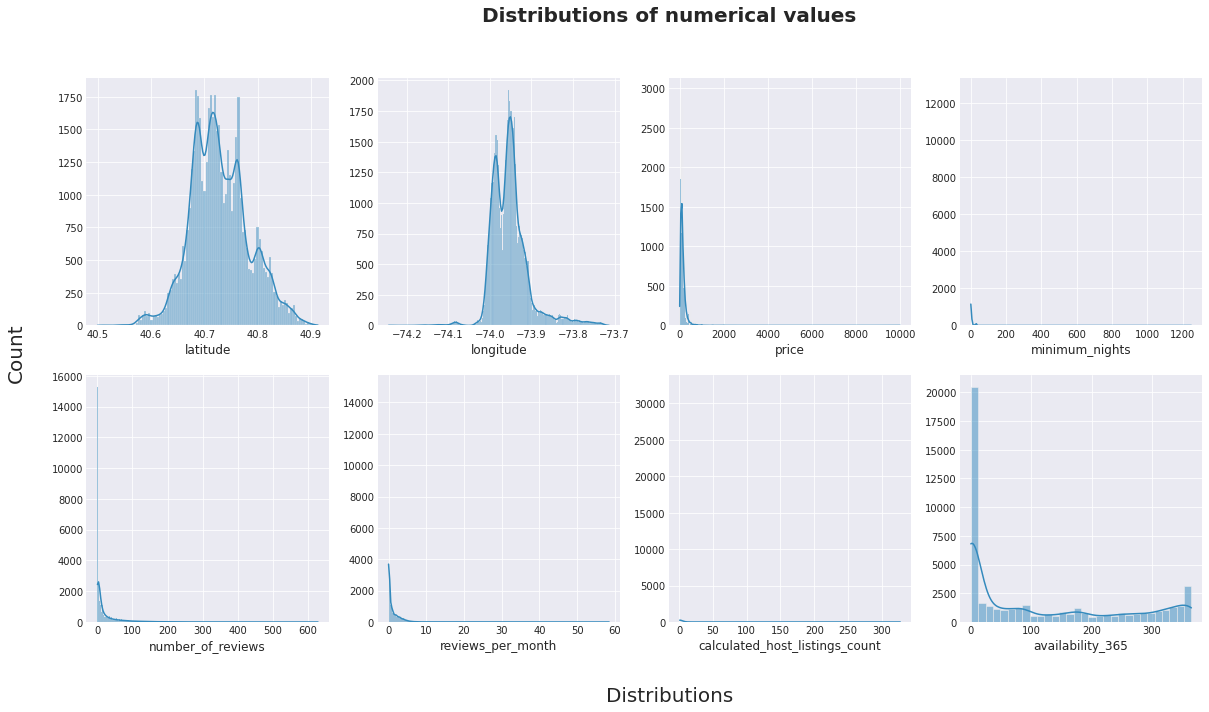

In [7]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
k = 0
for i in range(2):
    for j in range(4):
        sns.histplot(listing_df[num_cols[k]],ax=ax[i][j], kde=True, label=num_cols[k])
        ax[i][j].set(ylabel=None)
        k += 1
fig.suptitle('Distributions of numerical values', x = 0.53, weight='bold', fontsize = 20)
fig.supylabel('Count', x= 0.07, fontsize = 20)
fig.supxlabel('Distributions', x=0.53, fontsize = 20)
plt.show()

**Insight:**
* Latitude and longitude both exhibit seemingly normal distribution. This means that the population is likely to concentrate in some places more than others, likely the difference between residential areas and tourist attractions.
* The other values are heavily skewed due to large outliers.
* availability_365 exhibits strange distribution: mostly uniform in the middle with large spikes at the beginning and end.

Let's see how the numerical data correlate with one another

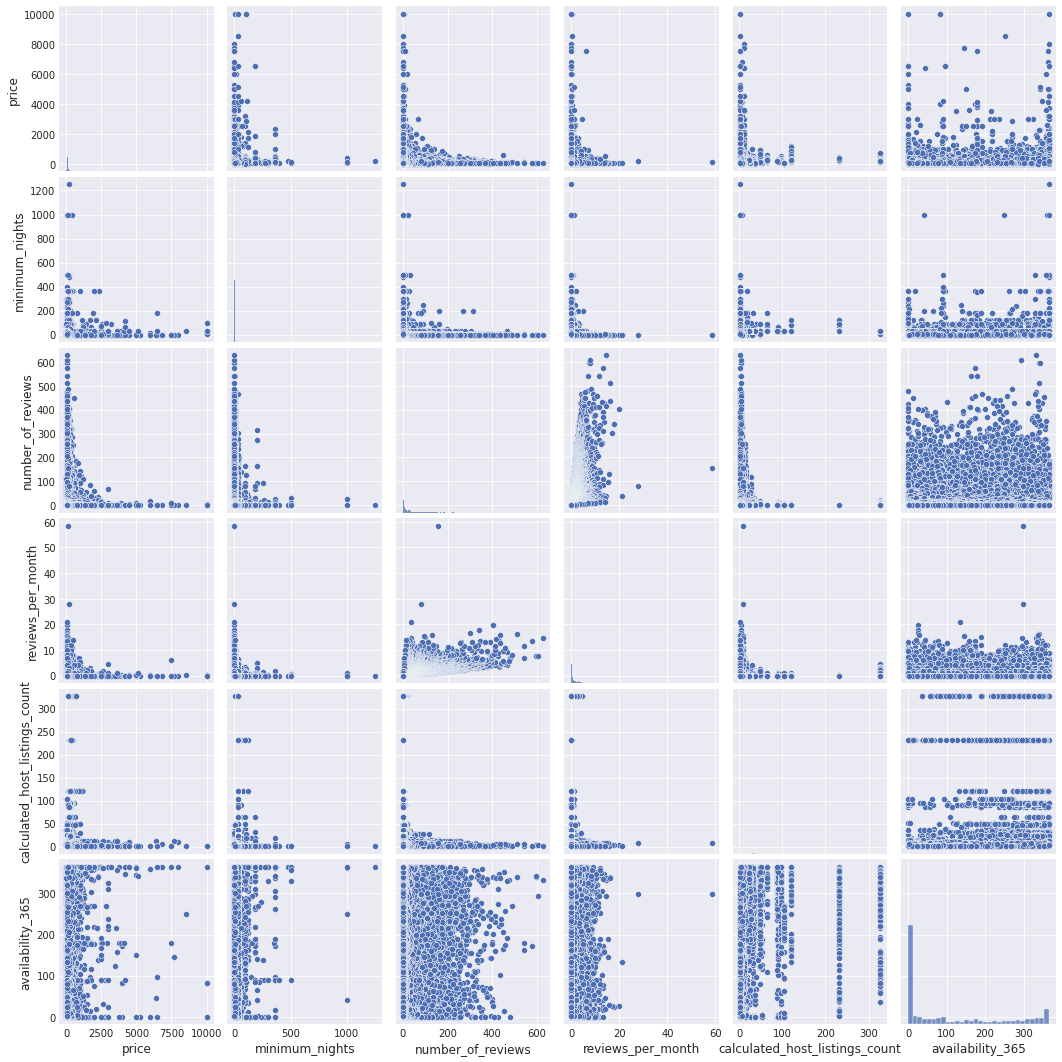

In [9]:
cols = ['price',
        'minimum_nights',
        'number_of_reviews',
        'reviews_per_month',
        'calculated_host_listings_count',
       'availability_365']
sns.pairplot(listing_df[cols], size = 2.5,plot_kws={'color':'#4d6eb2'},diag_kws={'color':'#4d6eb2'})
plt.show();

**Insight:** No two values exhibit noticeable correlation, save for reviews_per_month and number_of_reviews for obvious reason.

## Categorical data analysis

We'll start off by looking at the distribution of listings between different boroughs.

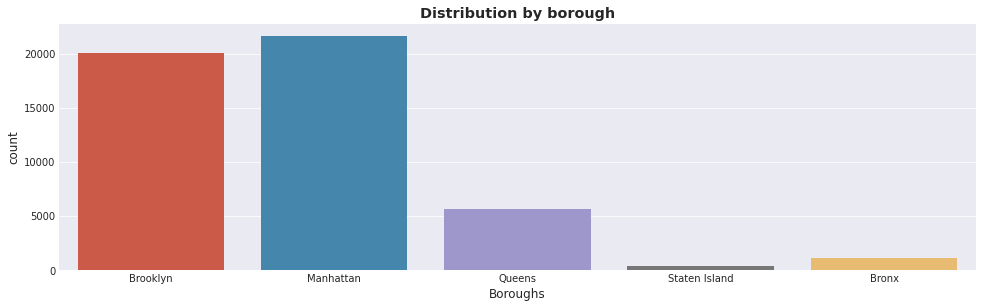

In [12]:
sns.catplot(data=listing_df,x='neighbourhood_group',kind='count')
fig = plt.gcf()
fig.set_size_inches(16, 4)
plt.xlabel('Boroughs')
plt.title('Distribution by borough', weight='bold')
plt.show()

Here, Brooklyn and Manhattan are neck-n-neck in terms listing number. Staten Island is underrepresented for obvious reason, having a population of roughly 500k. What's surprising here are the low numbers for Queens and the Bronx, having populations of \~2.5mil and \~1.5mil respectively, especially in relation to Brooklyn (\~2.7mil) and Manhattan (~1.4mil).

This can all be explained by the fact that Manhattan is a business center and tourist attraction of cultural significance. Whereas the Bronx, Queens, and Brooklyn to a certain extent, are residential areas.

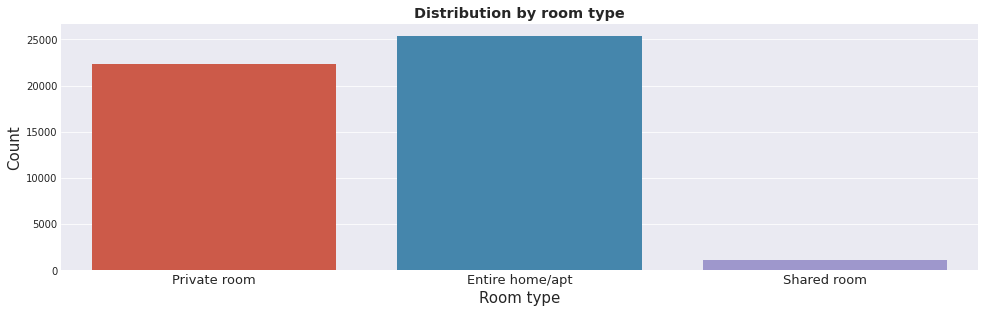

In [15]:
sns.catplot(data=listing_df,x='room_type',kind='count')
fig = plt.gcf()
fig.set_size_inches(16, 4)
plt.xticks(fontsize = 13)
plt.title('Distribution by room type', weight='bold')
plt.xlabel('Room type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

No surprise here, private rooms and homes/apartments are attractive offerings for guests with a slight edge towards home/apartments and guests are likely apprehensive towards sharing rooms with strangers. 

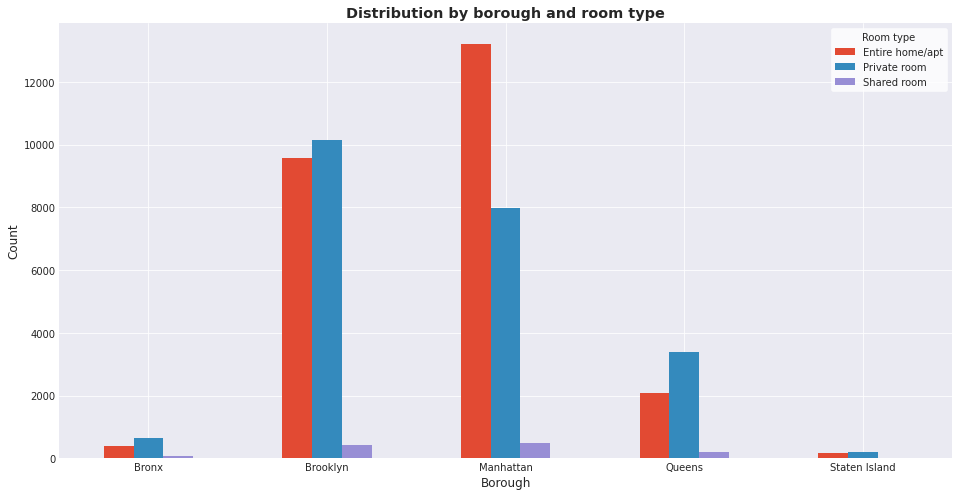

In [105]:
temp = pd.pivot_table(listing_df,
                     index = 'neighbourhood_group',
                     columns='room_type',
                     values='id',
                     aggfunc='count')
fig, ax = plt.subplots(figsize=(16,8))
temp.plot(kind='bar', ax=ax)
plt.title('Distribution by borough and room type', weight='bold')
plt.legend(title='Room type', 
           facecolor='w', 
           edgecolor='w', 
           framealpha= 0.8, 
           frameon=True)
plt.xlabel('Borough')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Insight:** Houses/apartments are inordinately featured in Manhattan compared to other room types. Other boroughs favour private rooms over with Queens being seemingly the inverse of Manhattan. Again, this makes sense as hosts living residential areas are less likely to own multiple properties, preferring to rent out spare rooms in their own homes.

This can be verified as follows

In [165]:
id_prop_count=pd.pivot_table(listing_df,
                             index='host_id',
                             columns='neighbourhood_group',
                             values='id',
                             aggfunc='count',
                            fill_value=0)
id_prop_count['total']=id_prop_count.sum(axis=1)
id_prop_count.sort_values('total', ascending=False).head(20)

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island,total
host_id,,,,,,
219517861,0,0,327,0,0,327
107434423,0,2,230,0,0,232
30283594,0,0,121,0,0,121
137358866,0,6,18,79,0,103
16098958,0,0,96,0,0,96
12243051,0,0,96,0,0,96
61391963,0,0,91,0,0,91
22541573,0,1,86,0,0,87
200380610,0,0,65,0,0,65


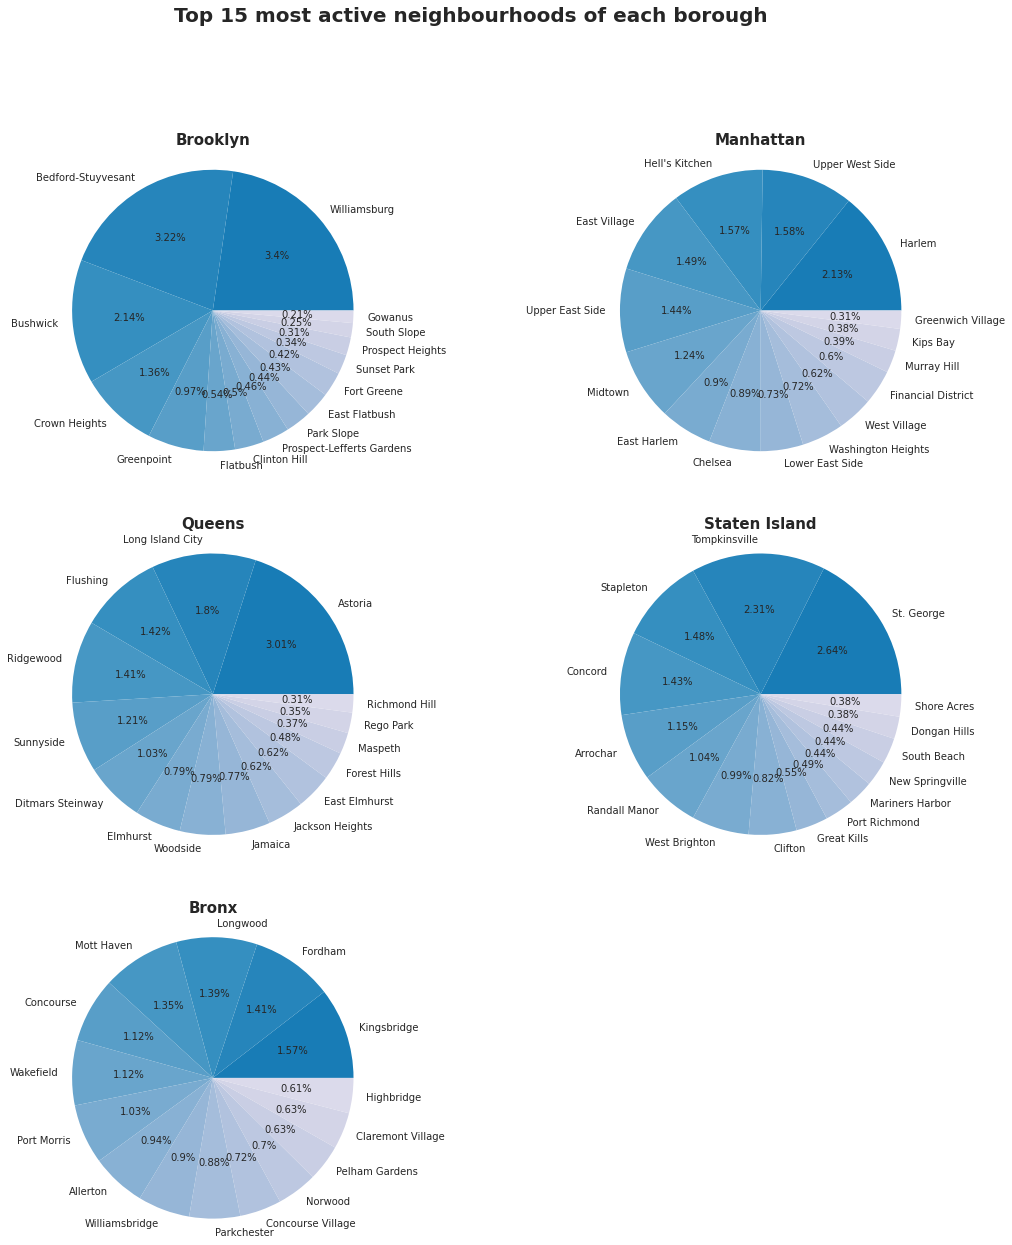

In [122]:
fig = plt.figure(figsize=(18, 20))
k = 0
cmap = plt.get_cmap('PuBu')
def absolute_value(val):
    a  = np.round(val/100.*len(pie_df), 2)
    return str(a)+'%'

boroughs=listing_df['neighbourhood_group'].unique()
for i in range(3):
    for j in range(2):
        pie_df = (listing_df[listing_df['neighbourhood_group']==boroughs[k]]
                  .groupby('neighbourhood')['id']
                  .count()
                  .sort_values(ascending=False).head(15))
        plt.subplot(3, 2, k+1)
        plt.pie(pie_df,labels=pie_df.index,radius=1.1, autopct=absolute_value, colors=cmap(np.linspace(0.7, 0.2, len(pie_df))))
        plt.title(boroughs[k], fontsize = 15, weight = 'bold')
        k += 1
        if k == 5:
            break
    if k == 5:
        break
fig.suptitle('Top 15 most active neighbourhoods of each borough', fontsize=20, weight='bold')
plt.show()

Not much can be said without additional context from these locations. However, this chart will be used to cross-reference information inferred from the textual analysis process in the following section

## Description Analysis
Though it may not seem like it, the *name* column contains much more information than meets the eye. Most "names" are actually short descriptions of listings. Counting the word frequencies of these descriptors may give us a clearer picture of each borough than merely relying on the other tabular data.

We'll start off by borrowing a little bit of NLP prowess.

In [195]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('omw-1.4')
from collections import Counter
import re

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Extract sentences and intializing lemmatizer.

*Sidenote:* A lemmatizer reduces words to lemmas. More specifically, a lemmatizer aims to remove variations of a word, called *inflections*, in order to group them as a single item.

In [84]:
_names = listing_df['name'].dropna().explode().values
_names = ' '.join(_names)
lemma = WordNetLemmatizer()

Tokenize words from sentences and lemmatize.

In [85]:
tokenized_text = word_tokenize(_names)
lemmed_text = [lemma.lemmatize(x).lower() for x in tokenized_text]

Filter out short words (less than 4) which tend to have low descriptive value.

In [86]:
filter = [x for x in lemmed_text if re.search(r'.{4,}$', x)]
word_count = Counter(filter).most_common()
top_25 = word_count[0:25]
WC_df = pd.DataFrame(top_25, columns=['word', 'count'])

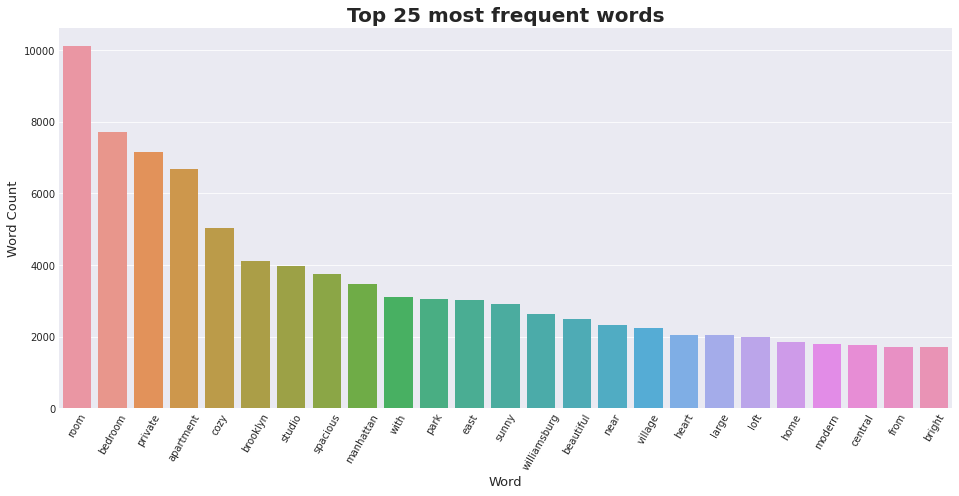

In [87]:
fig = plt.figure(figsize=(16,7))
sns.barplot(data=WC_df, x='word', y='count')
plt.xticks(rotation = 60)
plt.title('Top 25 most frequent words', weight = 'bold', fontsize=20)
plt.xlabel('Word', fontsize=13)
plt.ylabel('Word Count', fontsize=13)
plt.show()

**Insight** Taken as a whole, this plot does not say a whole lot as the most frequently used words are often generic and lack descriptive values. However, certain baser information can be gleamed from this chart alone:
* Brooklyn is featured slightly more than Manhattan despite previous analysis indicating otherwise.
* Most highly featured type of aparment is studio.
* Apartments are much more popular than houses, studio apartments are apparently in vogue, followed by loft apartments. (*Sidenote*: lofts are studios with high ceiling)
* Most hosts tend to favour "private" and "cozy" as descriptive terms.
* Being near parks or popular locations seem to be highly prized features for a lodging. 

# Question: Using textual information, what defining characteristics can we draw for each borough ?

First, we'll start off by iteratively finding words that are exclusive to each borough. We do this by rotating between each boroughs and finding the difference between its tokens and the tokens of other boroughs.

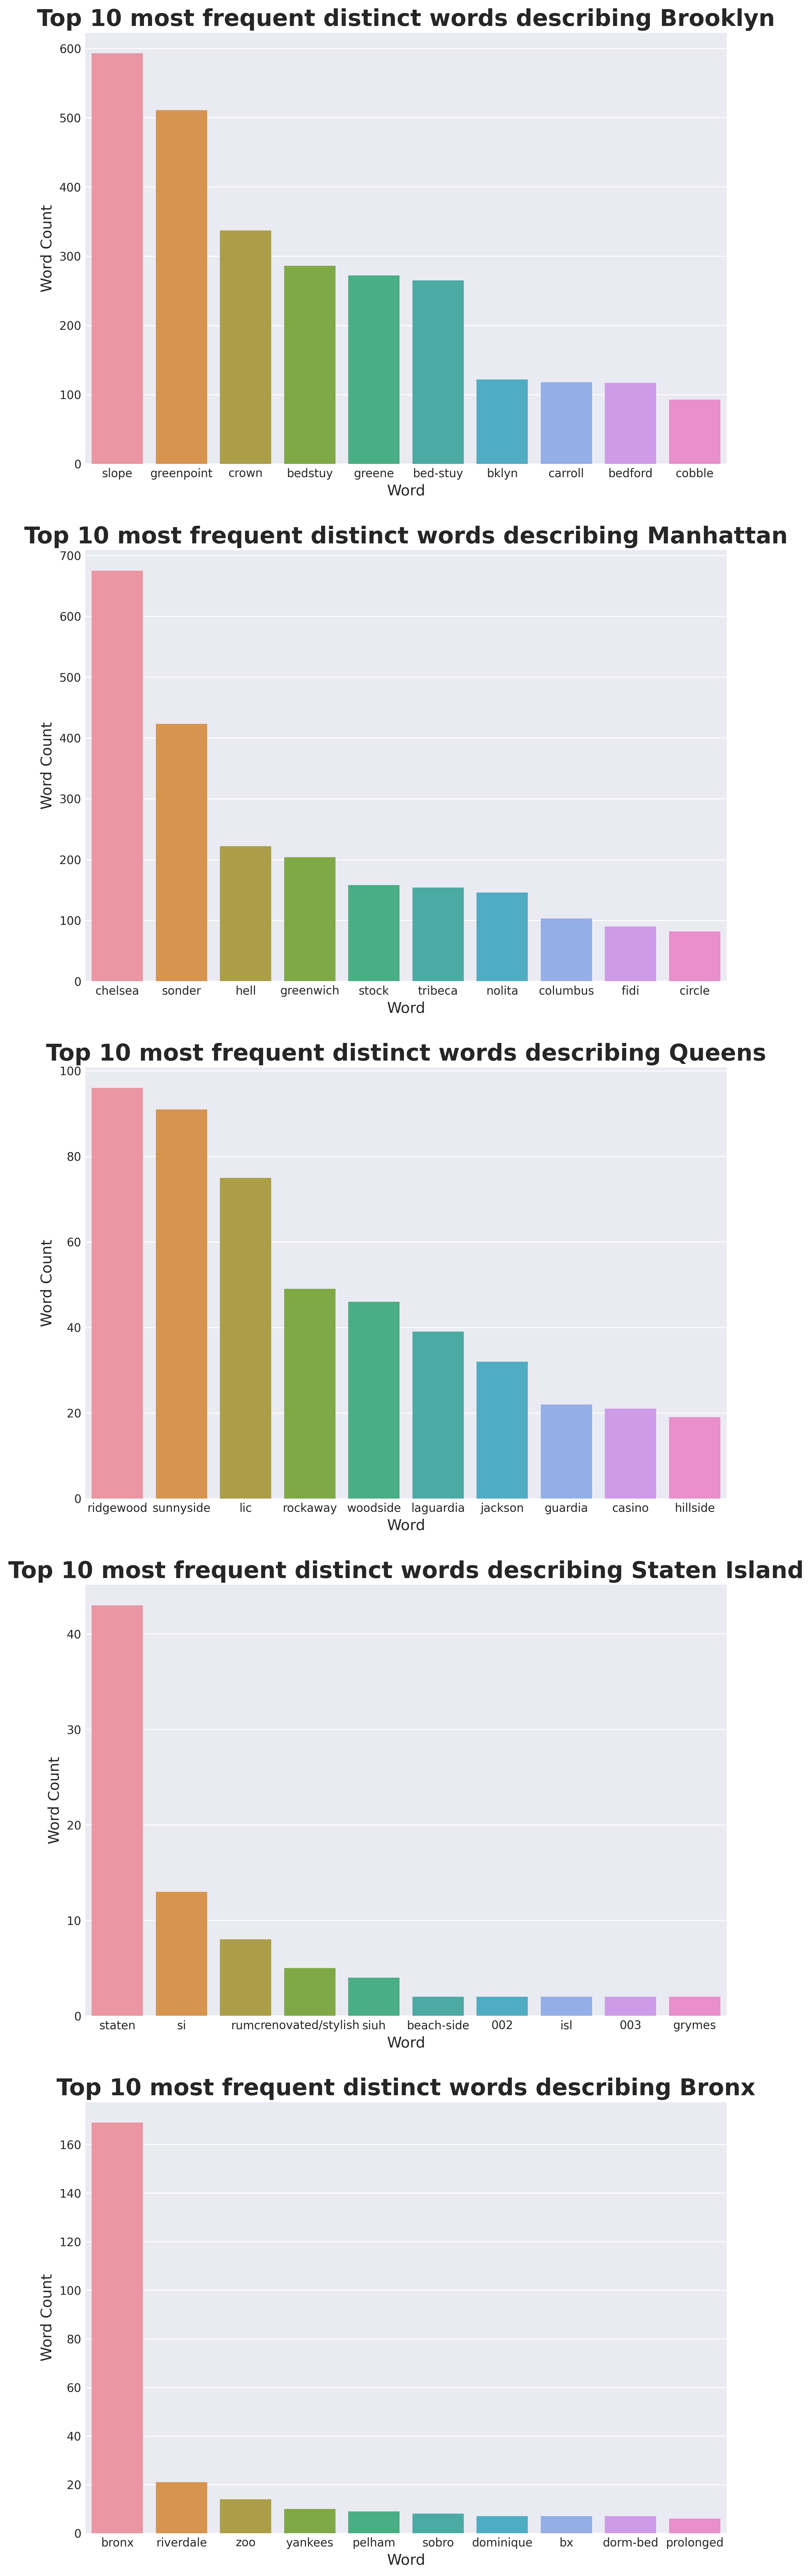

In [184]:
def diff(a, b):
    b = set(b)
    return [i for i in a if i not in b]

fig, ax = plt.subplots(5, 1, figsize=(10, 40), dpi=300)
for count, i in enumerate(listing_df['neighbourhood_group'].unique()):
    lemmatizer= WordNetLemmatizer()
    txt = ' '.join(listing_df[listing_df['neighbourhood_group']==i]['name']
                   .dropna().explode().values)
    other_txt = ' '.join(listing_df[listing_df['neighbourhood_group']!=i]['name']
                   .dropna().explode().values)
    tk_txt = word_tokenize(txt)
    other_tk_txt = word_tokenize(other_txt)
    lemmed_txt = [lemmatizer.lemmatize(x).lower() for x in tk_txt]
    lemmed_other_txt = [lemmatizer.lemmatize(x).lower() for x in other_tk_txt]
    filtered_txt = diff(lemmed_txt, lemmed_other_txt)
    wc = Counter(filtered_txt).most_common()
    top_10 = wc[0:10]
    WC_df = pd.DataFrame(top_10, columns=['word', 'count'])
    sns.barplot(data=WC_df, x='word', y='count', ax=ax[count])
    ax[count].set_title(f'Top 10 most frequent distinct words describing {i}', weight = 'bold', fontsize=20)
    ax[count].set_xlabel('Word', fontsize=13)
    ax[count].set_ylabel('Word Count', fontsize=13)
plt.show()

However, we would be remiss not to take into account words that can still be used other boroughs as the existence of one feature among other boroughs does not indicate the same level of prevalence.

In [35]:
fig, ax = plt.subplots(5, 1, figsize=(15, 60), dpi=300)
for count, i in enumerate(listing_df['neighbourhood_group'].unique()):
    lemmatizer= WordNetLemmatizer()
    txt = ' '.join(listing_df[listing_df['neighbourhood_group']==i]['name']
                   .dropna().explode().values)
    tk_txt = word_tokenize(txt)
    lemmed_txt = [lemmatizer.lemmatize(x).lower() for x in tk_txt]
    filtered_txt = [x for x in lemmed_txt if len(x) >= 4]
    wc = Counter(filtered_txt).most_common()
    top_25 = wc[0:25]
    WC_df = pd.DataFrame(top_25, columns=['word', 'count'])
    sns.barplot(data=WC_df, x='word', y='count', ax=ax[count])
    ax[count].set_title(f'Top 25 most frequent words describing {i}', weight = 'bold', fontsize=20)
    ax[count].set_xlabel('Word', fontsize=13)
    ax[count].set_ylabel('Word Count', fontsize=13)
    ax[count].set_xticklabels(WC_df.word.values, rotation=45)
plt.xticks(rotation=45)
plt.show()

By contrasting between different plots, we can build the following profiles for each borough:

**Manhattan:** Can be summed up as "business center", most listings make references to its business area with keywords such as "sonder" (business district), "stock", and "fidi" (short for financial district). Both Upper East Side and Upper West Side seem to be popular tourist attractions. Being located in Harlem seems to be downplayed as a feature despite Harlem having the most number of listings there. Many listings also make references to "Manhattan" even in the other boroughs, most seem to advertise how close the listing is to it.

**Brooklyn:** Characterized by its famous rows of residential brownstone houses, many of its neighbourhoods feature this type of house such as Park Slope, Bedford–Stuyvesant, Greenpoint, and Crown Heights. Brooklyn tends to advertise its outdoor features with keywords such as "sunny", "bright". Notable for Williamsburg, known for its contemporary art scene, hipster culture, and vibrant nightlife; it also happens to have the highest number of listings of all neighbourhoods.

**Queens:** Characterized as a transport hub, going by keywords such as "train", "subway", and "airport", likely routed to Manhattan. Home to two out of the three major airports in NYC. Many listings also advertise being close to these transport hubs.

**The Bronx:** Primary attractions are the Yankee Stadium and the Bronx Zoo. Lodgings tend to be described as large and spacious. Being near a metro line seems to be a salient point of advertisement.

**Staten Island:** Due to being an island, Staten Island makes a point to advertise its free ferry rides, especially to Manhattan. Also features a beach.

# Question: Which factors dictate prices ?
One primary point of concern for both hosts and guests is the pricing.

In [38]:
print('Max price: ', listing_df['price'].max())
print('Min price: ', listing_df['price'].min())

Max price:  10000
Min price:  0


For ease of analysis, we will transform it into logarithmic form. This will, in turn, transform the distribution into normal, making it useful for building prediction model.

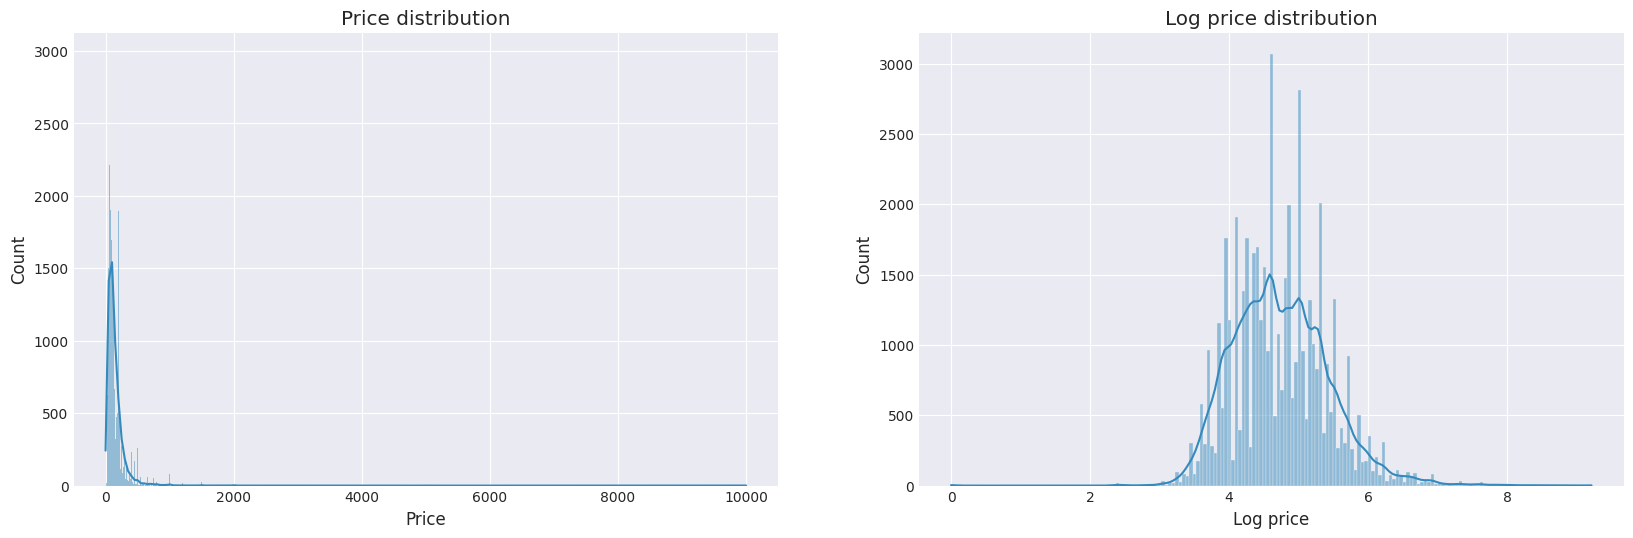

In [183]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), dpi=100)
sns.histplot(listing_df['price'], kde=True, ax=ax1)
ax1.set_title('Price distribution')
ax1.set_xlabel('Price')
sns.histplot(np.log1p(listing_df['price']), kde=True, ax=ax2)
ax2.set_title('Log price distribution')
ax2.set_xlabel('Log price')
plt.show()

All in all, prices have high varianceDue to high number of outliers, the following plots have datapoints limited to those below \$500 as it encapsulates about 97\% of all data points

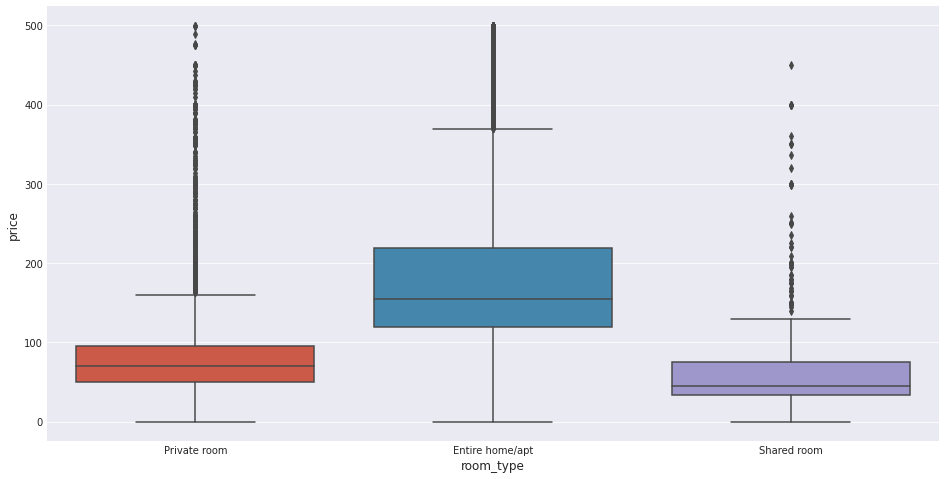

In [127]:
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.boxplot(data=listing_df[listing_df['price']<500], x='room_type', y='price')
plt.show()

**Insight:** Houses/apartments dominate over other room types in terms of prices for obvious reasons with variance trending towards higher prices. What's surprising is that private and shared rooms are not that far apart, despite the latter's lack of prominence.

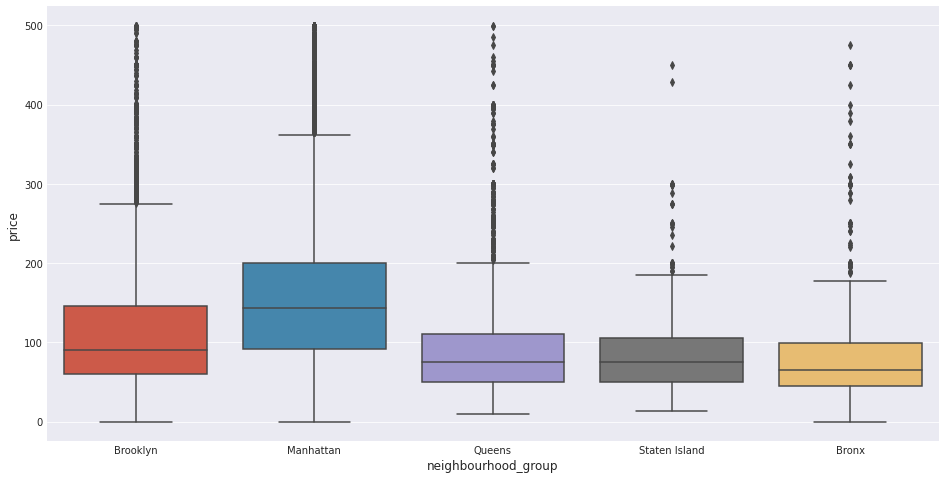

In [125]:
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.boxplot(data=listing_df[listing_df['price']<500], x='neighbourhood_group', y='price')
# ax.set_yscale('log')
plt.show()

**Insight:**
* Lodging price is highest in Manhattan. Houses tend to be cheaper in the Bronx.
* Queens, Staten Island, and the Bronx have roughly similar price range.
* Brooklyn has high variance trending towards higher prices, but roughly the same if not slightly higher median prices compared to other residential boroughs.


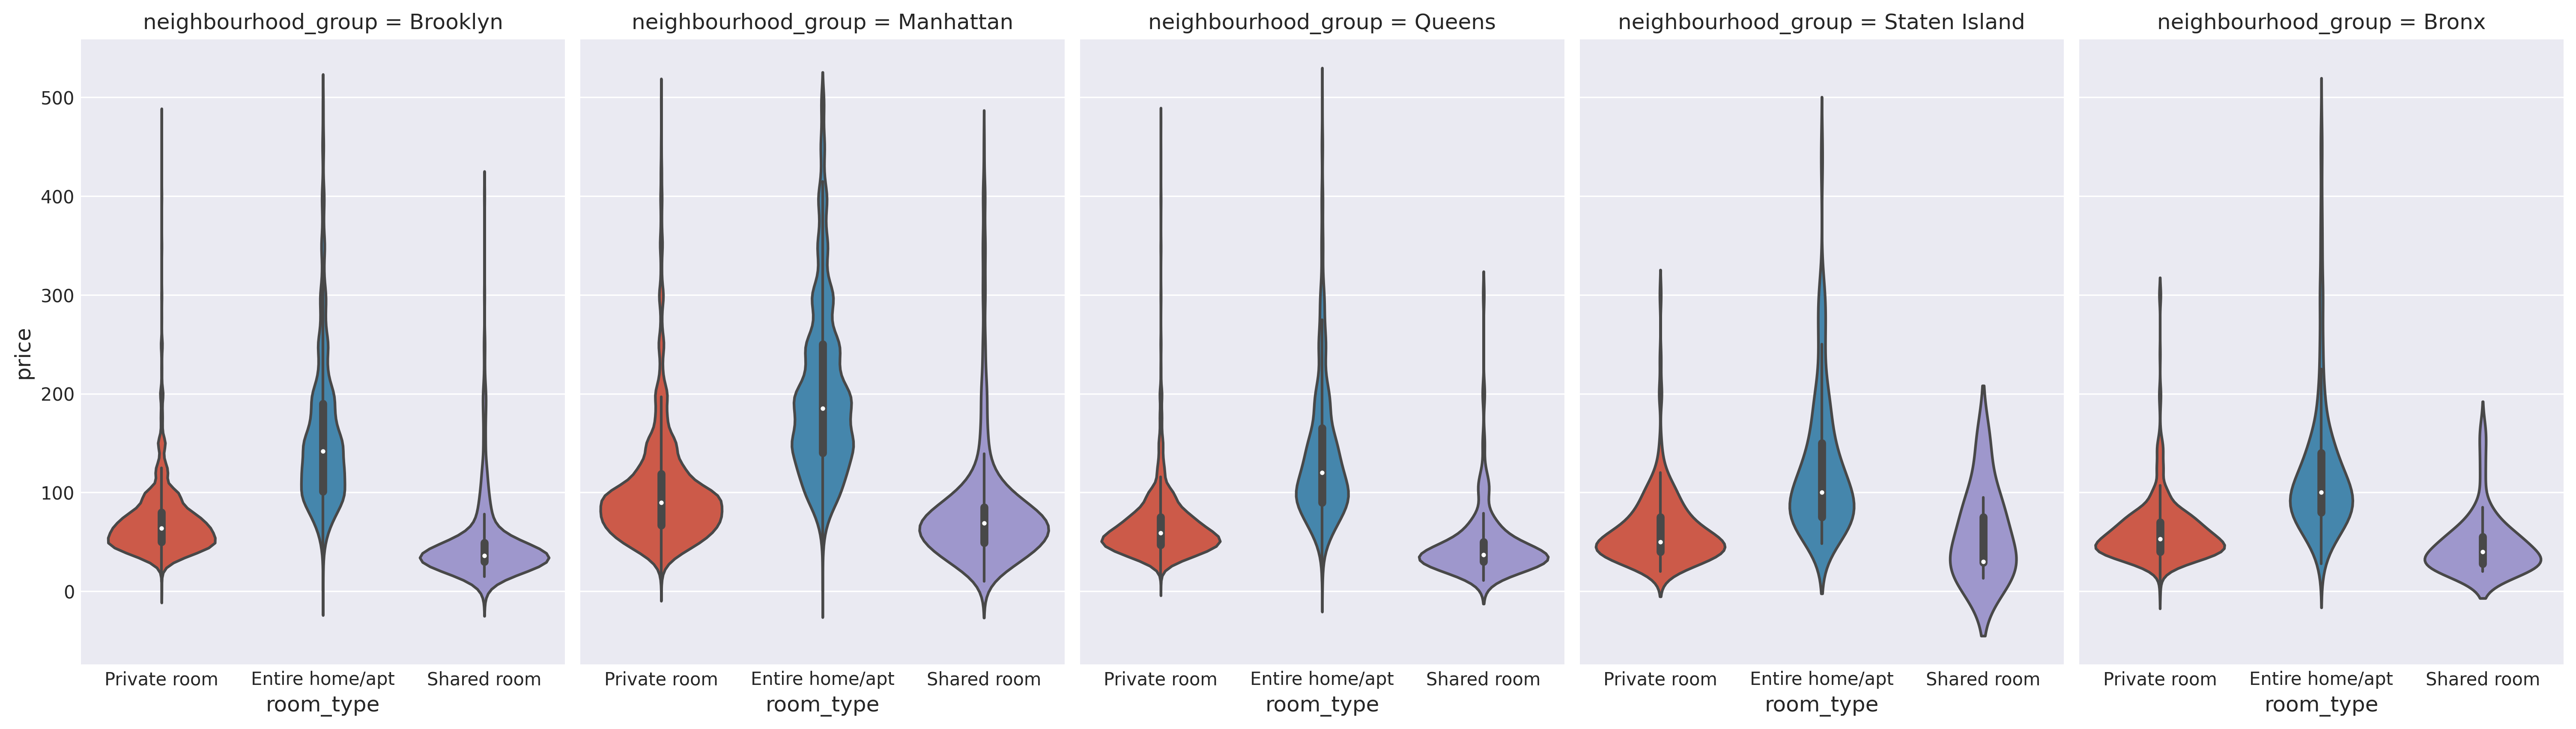

In [182]:
sns.catplot(data=listing_df[listing_df['price']<500],
                col='neighbourhood_group',
                y='price',
                x ='room_type',
                kind='violin'
           )
fig = plt.gcf()
fig.set_size_inches(20, 6)
fig.set_dpi(300)
plt.show()

**Insight:**
* Lodging prices in Manhattan is the highest across all room types. Prices are also fairly consistent for houses/apartment.
* Most room types across all boroughs display mostly normal distribution.
* Shared rooms in Staten Island have an odd long and thick tail. Likely due to low sample size.

# Price prediction

In this section, we'll use an XGBoosted model to predict prices and find out which values are the most important in dictating prices.

In [76]:
import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error as MSE

## Preprocessing

Opting out of "neighbourhood" to reduce complexity.

In [52]:
model_df = listing_df.drop(['id', 'host_id', 'name', 'host_name', 'price', 'last_review', 'neighbourhood'], axis=1)
target = np.log1p(listing_df['price'].values)

One-hot encoding for categorical variables

In [53]:
model_df = pd.concat([model_df.drop(['neighbourhood_group', 'room_type'], axis=1), pd.get_dummies(model_df[['neighbourhood_group', 'room_type']])], axis=1)

Train-test split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(model_df, target,test_size=0.2, random_state=42)

Using robust scaler due to high number of outliers.

In [55]:
rscaler = RobustScaler()
X_train = rscaler.fit_transform(X_train)
X_test = rscaler.fit_transform(X_test)

In [67]:
import datetime

## Training
### Cross-validate model

In [191]:
kf = KFold(n_splits=5)
score_list=[]
for fold, (idx_tr, idx_va) in enumerate(kf.split(X_train, y_train)):
    X_tr, X_val, y_tr, y_val, model = None, None, None, None, None
    start_time = datetime.datetime.now()
    X_tr = X_train[idx_tr]
    X_val = X_train[idx_va]
    y_tr = y_train[idx_tr]
    y_val = y_train[idx_va]
    model = XGBRegressor(n_estimators=500,
                         learning_rate=0.1,
                         max_depth=5,
                         min_child_weight=1 #sum of hessian, for regression is equal to number of observations
                        )
    model.fit(X_tr, y_tr, eval_set = [(X_val, y_val)],
              eval_metric='rmse',
             callbacks=[xgb.callback.EarlyStopping(rounds=20)])
    X_tr = None
    y_tr = None
    y_pred = model.predict(X_val)
    score = MSE(y_val, y_pred, squared=False)
    n_trees = model.best_iteration
    if n_trees is not None:
        print(f"Fold {fold} | {str(datetime.datetime.now() - start_time)[-12:-7]} |"
              f" {n_trees:5} trees |"
              f"                Score = {score:.5f}")
    score_list.append(score)
print(f"OOF Score:                       {np.mean(score_list):.5f}")

[0]	validation_0-rmse:3.86929
[1]	validation_0-rmse:3.48818
[2]	validation_0-rmse:3.14611
[3]	validation_0-rmse:2.83866
[4]	validation_0-rmse:2.56275
[5]	validation_0-rmse:2.31507
[6]	validation_0-rmse:2.09298
[7]	validation_0-rmse:1.89418
[8]	validation_0-rmse:1.71621
[9]	validation_0-rmse:1.55726
[10]	validation_0-rmse:1.41547
[11]	validation_0-rmse:1.28918
[12]	validation_0-rmse:1.17702
[13]	validation_0-rmse:1.07758
[14]	validation_0-rmse:0.98976
[15]	validation_0-rmse:0.91217
[16]	validation_0-rmse:0.84426
[17]	validation_0-rmse:0.78488
[18]	validation_0-rmse:0.73322
[19]	validation_0-rmse:0.68838
[20]	validation_0-rmse:0.64985
[21]	validation_0-rmse:0.61699
[22]	validation_0-rmse:0.58875
[23]	validation_0-rmse:0.56498
[24]	validation_0-rmse:0.54474
[25]	validation_0-rmse:0.52776
[26]	validation_0-rmse:0.51373
[27]	validation_0-rmse:0.50187
[28]	validation_0-rmse:0.49202
[29]	validation_0-rmse:0.48367
[30]	validation_0-rmse:0.47698
[31]	validation_0-rmse:0.47148
[32]	validation_0-

### Inference

In [190]:
y_pred = model.predict(X_test)
np.sqrt(MSE(y_test, y_pred))

0.4319345580983213

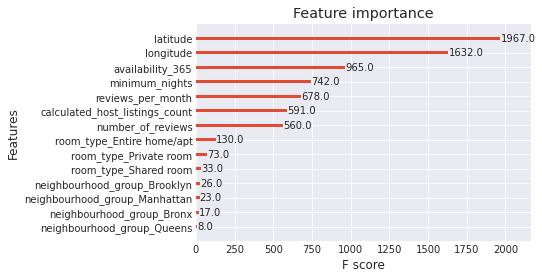

In [15]:
model.get_booster().feature_names = list(model_df.columns.values)
plot_importance(model)
plt.show()

**Insight:**
* latitude and longitude are extremely important, which makes sense as prices vary according to region.
* Categorical values don't fair too well, perhaps encoding error?

# Challenges

_ Lack of direction: I often find myself lost when it comes to how to steer the general flow of the notebook, or which data to focus on.\
_ Assumptions: I often make assumptions about the data without verifying.\
_ Description: I often find myself unable to express in words what the data is describing.\
_ Choosing dataset: I often fall into the pitfall of having a preconceived narrative before and picking datasets that fit that narrative.


# Reference
NLP: https://www.kaggle.com/code/astraz93/beginners-tokenization-stemming-and-lemmatization